In [418]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import qiskit

In [419]:
import random

def bit_flip_err_detect_circuit():
    bit_flip_err_detect = QuantumCircuit(5, 2)
    bit_flip_err_detect.cx(0, 1)
    bit_flip_err_detect.cx(0, 2)

    bit_flip_err_detect.cx(0, 3)
    bit_flip_err_detect.cx(1, 3)
    bit_flip_err_detect.cx(1, 4)
    bit_flip_err_detect.cx(2, 4)

    bit_flip_err_detect.measure(3, 0)
    bit_flip_err_detect.measure(4, 1)


    with bit_flip_err_detect.if_test((0, 1)):
        with bit_flip_err_detect.if_test((1, 0)):
            bit_flip_err_detect.x(0)

    with bit_flip_err_detect.if_test((0, 1)):
        with bit_flip_err_detect.if_test((1, 1)):
            bit_flip_err_detect.x(1)


    with bit_flip_err_detect.if_test((0, 0)):
        with bit_flip_err_detect.if_test((1, 1)):
            bit_flip_err_detect.x(2)

    bit_flip_err_detect.draw("mpl")
    return bit_flip_err_detect

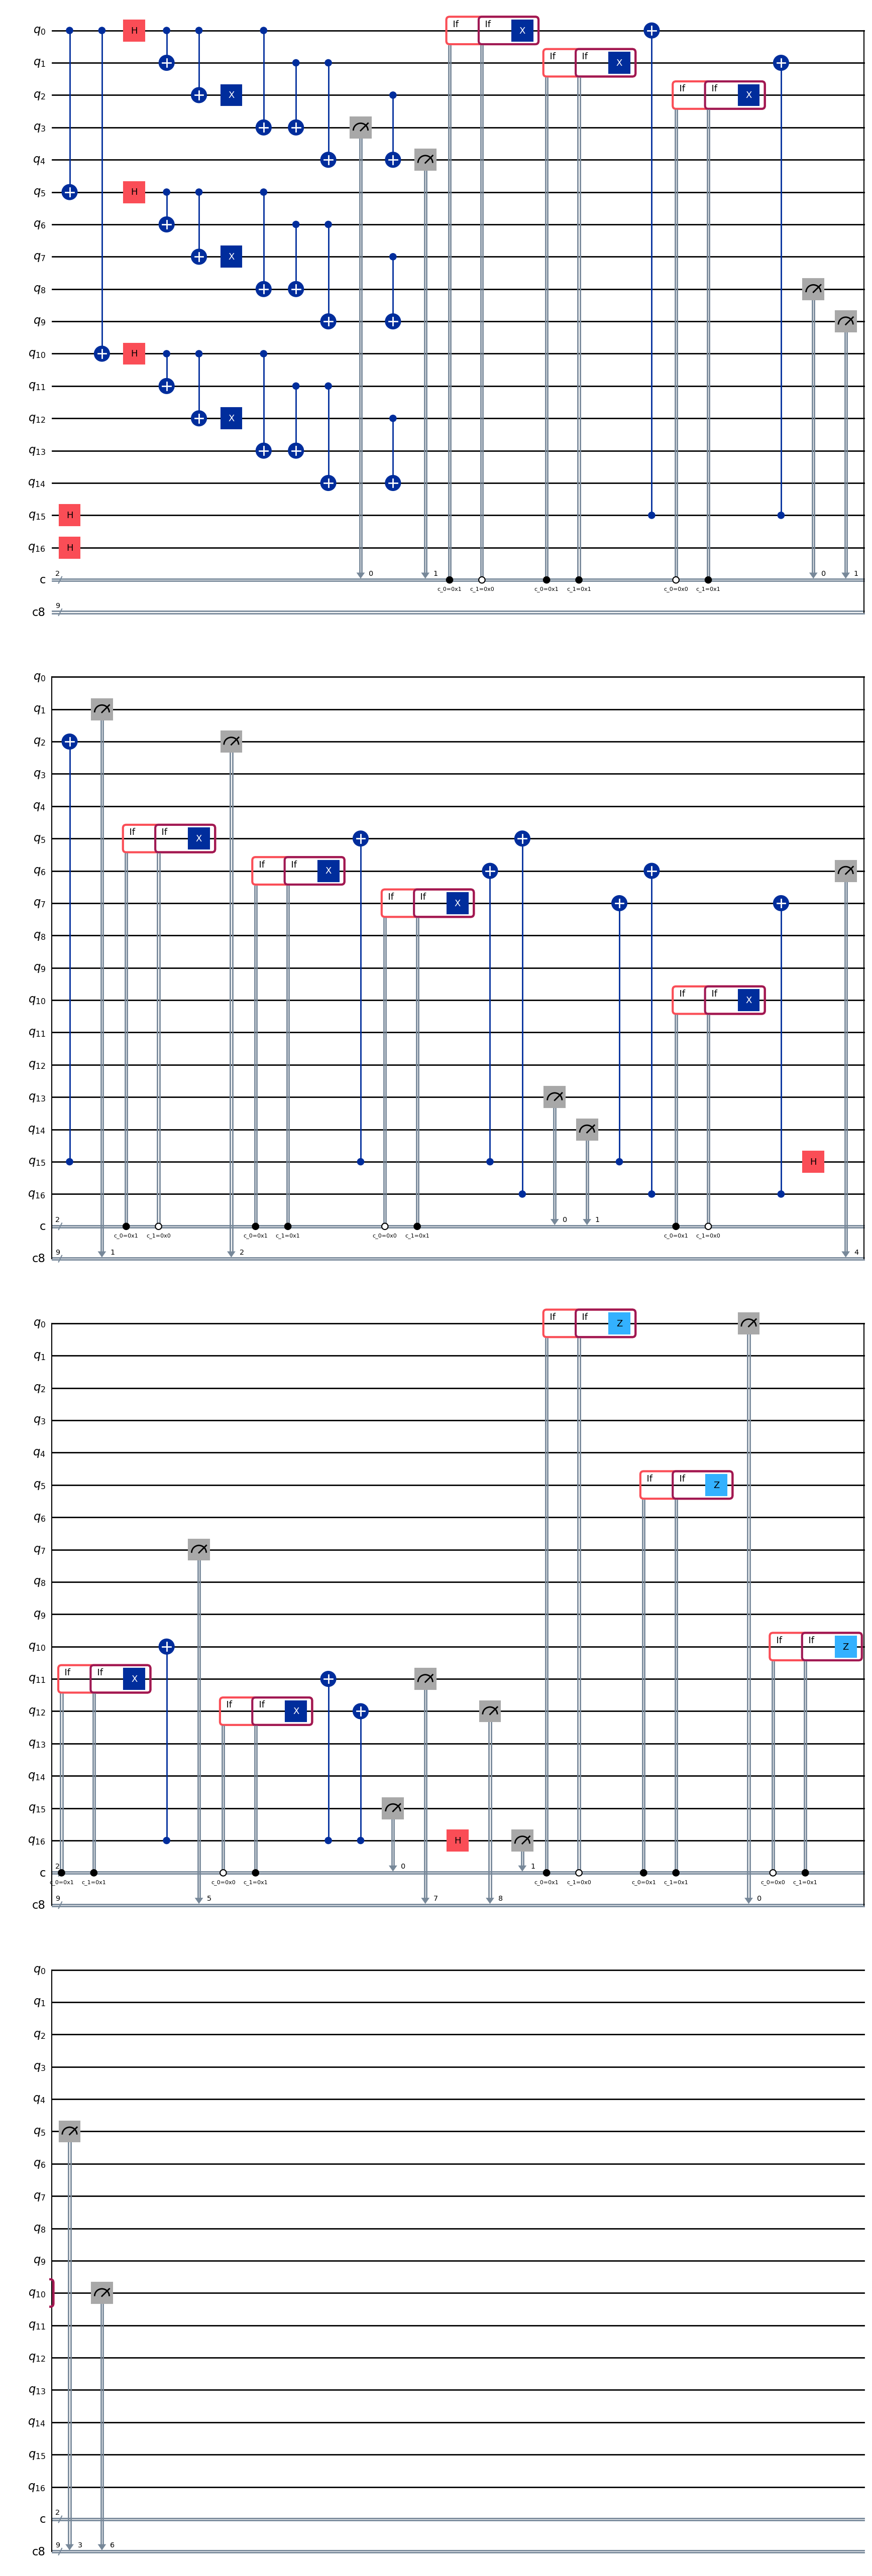

In [420]:
def shor_code_9_qubits():
    circuit = QuantumCircuit(17)
    circuit.cx(0, 5)
    circuit.cx(0, 10)
    circuit.h(0)
    circuit.h(5)
    circuit.h(10)
    circuit.compose(bit_flip_err_detect_circuit(), qubits=[0, 1, 2, 3, 4], inplace=True)
    circuit.compose(bit_flip_err_detect_circuit(), qubits=[5, 6, 7, 8, 9], inplace=True)
    circuit.compose(bit_flip_err_detect_circuit(), qubits=[10, 11, 12, 13, 14], inplace=True)
    circuit.h(15)
    circuit.h(16)
    for i in [0, 5]:
        for j in range(3):
            circuit.cx(15, i + j)
    for i in [5, 10]:
        for j in range(3):
            circuit.cx(16, i + j)
    circuit.h(15)
    circuit.h(16)
    circuit.measure(15, 0)
    circuit.measure(16, 1)
    with circuit.if_test((0, 1)):
        with circuit.if_test((1, 0)):
            circuit.z(0)
    with circuit.if_test((0, 1)):
        with circuit.if_test((1, 1)):
            circuit.z(5)
    with circuit.if_test((0, 0)):
        with circuit.if_test((1, 1)):
            circuit.z(10)
    circuit.add_register(qiskit.ClassicalRegister(9))
    circuit.measure([0, 1, 2, 5, 6, 7, 10, 11, 12], [2, 3, 4, 5, 6, 7, 8, 9, 10])

    return circuit

shor_code_9_qubits().draw("mpl")

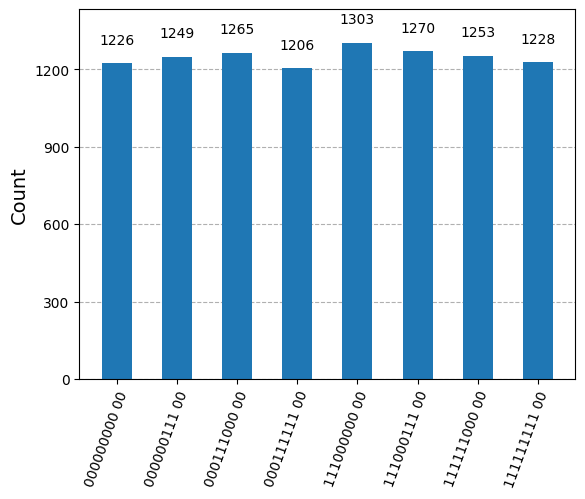

In [421]:
simulator = AerSimulator()

job = simulator.run(shor_code_9_qubits(), shots=10000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)